# Análisis de la Cesta de Compra

### Definición:

Es una técnica habitual utilizada en sectores de Distribución y Gran Consumo (Alimentación, Textil, Perfumería…) y cualquier otro sector que tenga el canal online como uno de los principales canales de distribución (Editorial, Audiovisual…)

El modelo de análisis de la cesta de la compra recorre los datos buscando cómo se relacionan entre ellos. Es decir, trata de encontrar las reglas de asociación que relacionan unos productos con otros en una compra.

Al analizar un gran volumen de compras de distintos clientes, establece reglas con porcentajes de probabilidad que indican qué artículos se suelen comprar al mismo tiempo, permitiendo conocer más sobre los hábitos de consumo de los clientes habituales.

El patrón de compra que se encuentra en los datos no solo relaciona pares de productos, si no que también identifica “lotes” de artículos que se suelen vender de forma conjunta aunque a priori no existe una relación directa observable a simple vista.

Con la información obtenida de un Análisis de la Cesta de la Compra, se pueden poner en marcha acciones como:

* Recolocar los productos en el espacio de venta (físico u online) tratando de acercar aquellos que suelen ir en la misma compra
* Identificar productos “gancho” que consigan aumentar el valor medio de la cesta de la compra
* Cross – selling o up – selling, recomendando productos relacionados
* Diseñar lotes o paquetes de artículos para potenciar el consumo de uno de ellos
* Descatalogar artículos

## Cargando la información

In [31]:
# Imports:

import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re # advanced string selection
%matplotlib inline

In [2]:
# Cargando la información:

df = pd.read_excel("Online_Retail_Datos.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Limpieza de datos

In [3]:
# Chequeando valores faltantes:

print(df.isnull().sum(axis=0))

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# Eliminando esas filas con valores faltantes:

df = df[pd.notnull(df['CustomerID'])]

In [5]:
# Valores mínimos:

df.Quantity.min()

-80995

In [6]:
# Eliminando valores negativos:

df = df[(df['Quantity']>0)]

In [7]:
# Seteando InvoiceDate como índice del dataframe y llevándolo a formate datetime de pandas:

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.set_index(['InvoiceDate'] , inplace=True)

In [8]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [9]:
# Stock Code no nos es relevante para este análisis:

df.drop('StockCode', axis=1, inplace=True)

In [10]:
df.head()

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,
2010-12-01 08:26:00,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


## Análisis y visualización de la información

In [13]:
# Analizando la cantidad de ventas por país:

paises_df = df[['Country', 'InvoiceNo']]

In [15]:
paises_df.head()

,Country,InvoiceNo
InvoiceDate,,
2010-12-01 08:26:00,United Kingdom,536365
2010-12-01 08:26:00,United Kingdom,536365
2010-12-01 08:26:00,United Kingdom,536365
2010-12-01 08:26:00,United Kingdom,536365
2010-12-01 08:26:00,United Kingdom,536365


In [16]:
paises_df = paises_df.pivot_table(columns='Country', aggfunc='count')
paises_df.sort_values('InvoiceNo', axis=1, ascending=False).T

,InvoiceNo
Country,
United Kingdom,354345
Germany,9042
France,8342
EIRE,7238
Spain,2485
Netherlands,2363
Belgium,2031
Switzerland,1842
Portugal,1462


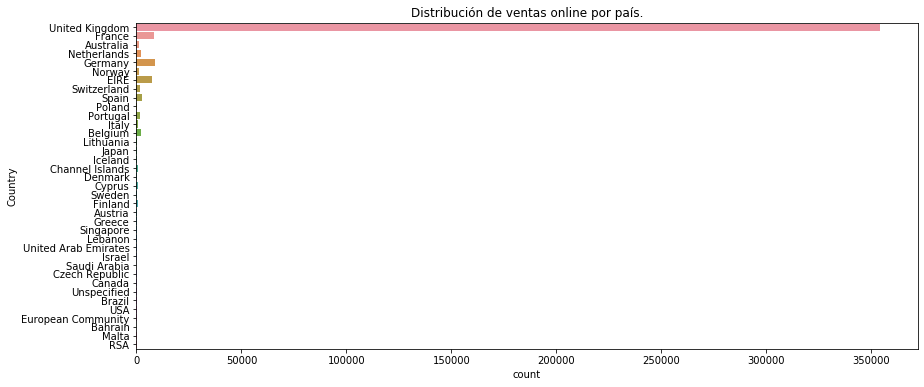

In [19]:
# Graficando la distribución por país:

plt.figure(figsize=(14,6))
plt.title('Distribución de ventas online por país.');
sns.countplot(y='Country', data=df);

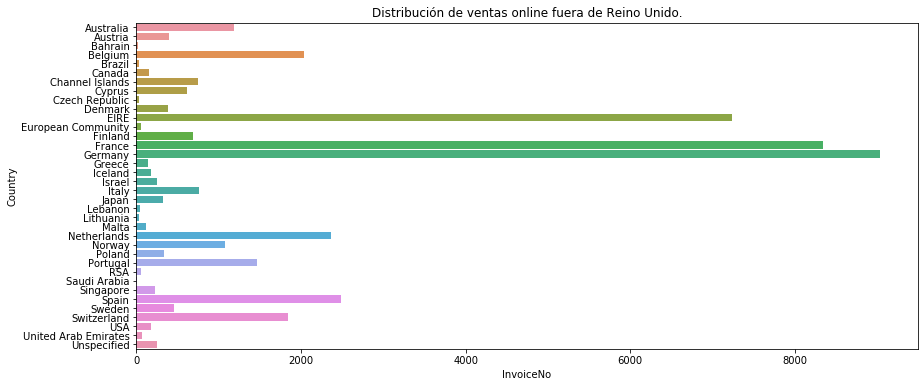

In [27]:
# Analizando en mayor profundidad la distribución de las ventas fueras de Reino Unido:

df_sin_UK = paises_df.T.drop("United Kingdom")

plt.figure(figsize=(14,6))
plt.title("Distribución de ventas online fuera de Reino Unido.");

# Note that since we transformed the index in type category the .remove_unused_categories is used
# otherwise it woul include a columns for United Kingdom with 0 values at the very end of the plot
sns.barplot(y=df_sin_UK.index, x='InvoiceNo', data=df_sin_UK, orient='h');

In [32]:
# Creando un dataframe para cada país, por medio de un diccionario:


def df_por_pais(df):
    """
    Recibe el dataframe que contiene toda la información y devuelve un diccionario con el df segmentado para cada país.
    """
    
    df_dict = {}  # Comienza con un diccionario vacío.
    
    unique_countries, counts = np.unique(df.Country, return_counts=True)
    
    for country in unique_countries:
        df_dict["df_{}".format(re.sub('[\s+]', '', country))] = df[df.Country == country].copy()   # lo copia para el país dado
        df_dict["df_{}".format(re.sub('[\s+]', '', country))].drop('Country', axis=1, inplace=True) # elimina la columna "country"
    
    return df_dict

In [33]:
# Aplicando la función:

df_dict = df_por_pais(df)

In [34]:
# Para no tener que ir seleccionando cada país dentro del diccionario, se puede hacer:

locals().update(df_dict)

In [35]:
# Chequeando con un país:
df_Belgium

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID
InvoiceDate,,,,,
2010-12-03 16:35:00,537026,SET OF 20 KIDS COOKIE CUTTERS,12,2.10,12395.0
2010-12-03 16:35:00,537026,RED RETROSPOT ROUND CAKE TINS,2,9.95,12395.0
2010-12-03 16:35:00,537026,PACK OF 72 RETROSPOT CAKE CASES,120,0.42,12395.0
2010-12-03 16:35:00,537026,PACK OF 60 PINK PAISLEY CAKE CASES,120,0.42,12395.0
2010-12-03 16:35:00,537026,PACK OF 60 SPACEBOY CAKE CASES,120,0.42,12395.0
...,...,...,...,...,...
2011-12-09 10:10:00,581493,CHARLOTTE BAG APPLES DESIGN,10,0.85,12423.0
2011-12-09 10:10:00,581493,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,0.79,12423.0
2011-12-09 10:10:00,581493,BIRDCAGE DECORATION TEALIGHT HOLDER,12,1.25,12423.0


In [40]:
# Series plot function summarizing df_Countries
def series_plot(df, by1, by2, by3, period='D'):
    """
    Función que recibe un dataframe y devuelve una serie de gráficos:
    - Cantidad vendida
    - Precio unitario
    - InvoiceNo
    En el periodo analizado (1 año)
    """
    df_ts = df.reset_index().pivot_table(index='InvoiceDate', 
                                values=['InvoiceNo', 'Quantity', 'UnitPrice'], 
                                aggfunc=('count', 'sum'))
    df_ts = df_ts.loc[:, [('InvoiceNo', 'count'), ('Quantity', 'sum'), ('UnitPrice', 'sum')]]
    df_ts.columns = df_ts.columns.droplevel(1)
    plt.figure(figsize=(14, 6))
    
    plt.subplot(2, 2, 1)
    plt.plot(df_ts.resample(period).sum().bfill()[[by1]], color='lightcoral')
    plt.title('{}'.format(by1));
    plt.xticks(rotation=60);
    plt.subplot(2, 2, 2)
    plt.title('{}'.format(by2));
    plt.plot(df_ts.resample(period).sum().bfill()[[by2]], label='Total Sale', color='mediumslateblue');
    plt.xticks(rotation=60)
    plt.tight_layout()
    
    plt.figure(figsize=(14, 8))
    plt.title('{}'.format(by3));
    plt.plot(df_ts.resample(period).sum().bfill()[[by3]], label='Total Invoices', color='steelblue');
    plt.tight_layout()

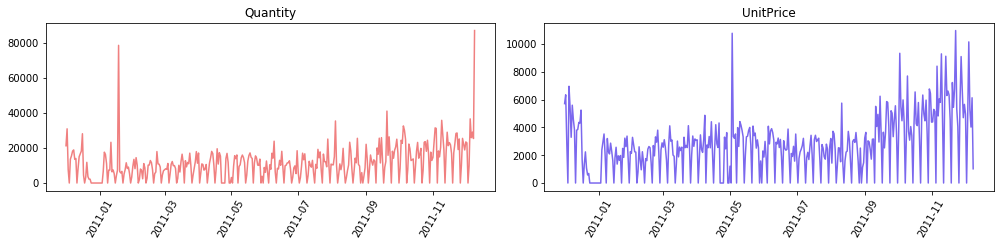

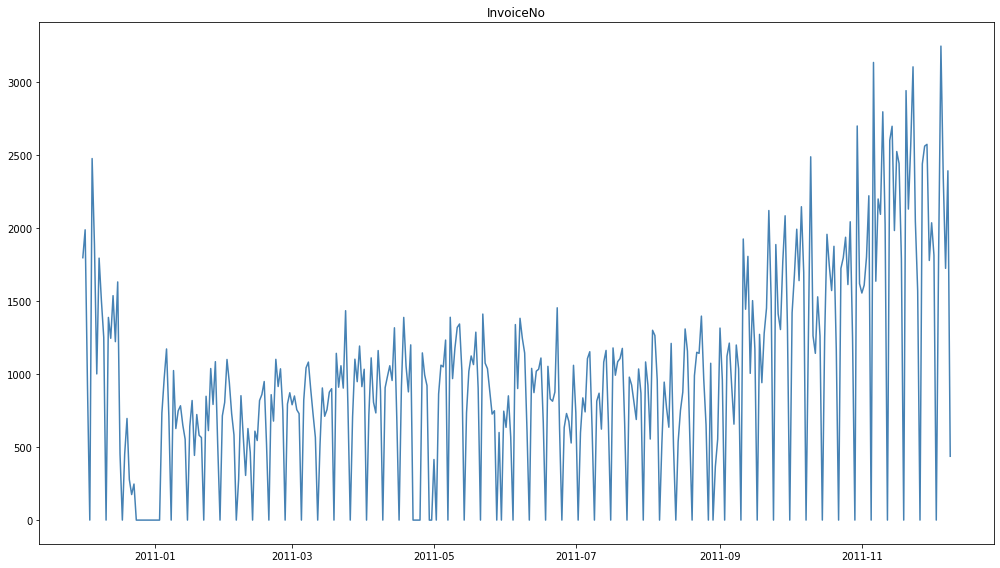

In [41]:
series_plot(df_UnitedKingdom, 'Quantity', 'UnitPrice', 'InvoiceNo')

# Análisis de la Cesta de Compra

## Reglas de asociación

In [53]:
df_UnitedKingdom.InvoiceNo = df_UnitedKingdom.InvoiceNo.astype('int64')

In [54]:
# Preparando la información para poder aplicar el método

# Limpiando la columna "Description" para poder realizar la agregación:

df_UnitedKingdom.loc[:, 'Description'] = df_UnitedKingdom.Description.str.strip().copy()

# Creación de canastas_sets, indexados por InvoiceNo con 1 correspondiente a cada artículo presentado en la cesta
# No se considera la cantidad comprada, solo si el artículo estaba presente o no en la cesta

canasta = pd.get_dummies(df_UnitedKingdom.reset_index().loc[:, ('InvoiceNo', 'Description')])

In [57]:
canastas_sets = pd.pivot_table(canasta, index='InvoiceNo', aggfunc='sum')

In [58]:
canastas_sets

,Description_10 COLOUR SPACEBOY PEN,Description_12 COLOURED PARTY BALLOONS,Description_12 DAISY PEGS IN WOOD BOX,Description_12 EGG HOUSE PAINTED WOOD,Description_12 HANGING EGGS HAND PAINTED,Description_12 IVORY ROSE PEG PLACE SETTINGS,Description_12 MESSAGE CARDS WITH ENVELOPES,Description_12 PENCIL SMALL TUBE WOODLAND,Description_12 PENCILS SMALL TUBE RED RETROSPOT,Description_12 PENCILS SMALL TUBE SKULL,...,Description_ZINC STAR T-LIGHT HOLDER,Description_ZINC SWEETHEART SOAP DISH,Description_ZINC SWEETHEART WIRE LETTER RACK,Description_ZINC T-LIGHT HOLDER STAR LARGE,Description_ZINC T-LIGHT HOLDER STARS LARGE,Description_ZINC T-LIGHT HOLDER STARS SMALL,Description_ZINC TOP 2 DOOR WOODEN SHELF,Description_ZINC WILLIE WINKIE CANDLE STICK,Description_ZINC WIRE KITCHEN ORGANISER,Description_ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from mlxtend.frequent_patterns import apriori 
from mlxtend.frequent_patterns import association_rules 

In [70]:
# Se llevan a valor binario para poder aplicar apriori:

In [68]:
column_names = canastas_sets.select_dtypes(include=[np.number]).columns
canastas_sets[column_names] = canastas_sets[column_names].astype(bool)

In [86]:
# Usando "apriori" para crear los sets de items frecuentes


sets_de_items_frecuentes = apriori(canastas_sets, min_support=0.02, use_colnames=True)
sets_de_items_frecuentes['length'] = sets_de_items_frecuentes['itemsets'].apply(lambda x: len(x))

# Advanced and strategical data frequent set selection
sets_de_items_frecuentes[ (sets_de_items_frecuentes['length'] > 1) &
                   (sets_de_items_frecuentes['support'] >= 0.02) ].head()

,support,itemsets,length
200,0.027269,"(Description_ALARM CLOCK BAKELIKE GREEN, Descr...",2
201,0.027509,(Description_GARDENERS KNEELING PAD CUP OF TEA...,2
202,0.024266,"(Description_GREEN REGENCY TEACUP AND SAUCER, ...",2
203,0.028590,"(Description_ROSES REGENCY TEACUP AND SAUCER, ...",2
204,0.023905,"(Description_HEART OF WICKER SMALL, Descriptio...",2


In [87]:
# Creando las reglas de asociación
# Seleccionando los parámetros mas importantes:

reglas = association_rules(sets_de_items_frecuentes, metric="lift", min_threshold=1)

In [88]:
reglas

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Description_ALARM CLOCK BAKELIKE GREEN),(Description_ALARM CLOCK BAKELIKE RED),0.041444,0.045528,0.027269,0.657971,14.451925,0.025382,2.790617
1,(Description_ALARM CLOCK BAKELIKE RED),(Description_ALARM CLOCK BAKELIKE GREEN),0.045528,0.041444,0.027269,0.598945,14.451925,0.025382,2.390084
2,(Description_GARDENERS KNEELING PAD CUP OF TEA),(Description_GARDENERS KNEELING PAD KEEP CALM),0.037660,0.044567,0.027509,0.730463,16.390122,0.025831,3.544712
3,(Description_GARDENERS KNEELING PAD KEEP CALM),(Description_GARDENERS KNEELING PAD CUP OF TEA),0.044567,0.037660,0.027509,0.617251,16.390122,0.025831,2.514283
4,(Description_GREEN REGENCY TEACUP AND SAUCER),(Description_PINK REGENCY TEACUP AND SAUCER),0.036759,0.029611,0.024266,0.660131,22.293137,0.023177,2.855182
...,...,...,...,...,...,...,...,...,...
71,"(Description_ROSES REGENCY TEACUP AND SAUCER, ...",(Description_GREEN REGENCY TEACUP AND SAUCER),0.023004,0.036759,0.020482,0.890339,24.221015,0.019636,8.783841
72,"(Description_GREEN REGENCY TEACUP AND SAUCER, ...",(Description_ROSES REGENCY TEACUP AND SAUCER),0.024266,0.040723,0.020482,0.844059,20.726763,0.019494,6.151553
73,(Description_ROSES REGENCY TEACUP AND SAUCER),"(Description_GREEN REGENCY TEACUP AND SAUCER, ...",0.040723,0.024266,0.020482,0.502950,20.726763,0.019494,1.963050
74,(Description_GREEN REGENCY TEACUP AND SAUCER),"(Description_ROSES REGENCY TEACUP AND SAUCER, ...",0.036759,0.023004,0.020482,0.557190,24.221015,0.019636,2.206352


In [96]:
# Observando las reglas obtenidas con mayor support:

reglas[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False).head(10)

,antecedents,consequents,support,confidence,lift
12,(Description_JUMBO BAG RED RETROSPOT),(Description_JUMBO BAG PINK POLKADOT),0.030392,0.349689,7.169917
13,(Description_JUMBO BAG PINK POLKADOT),(Description_JUMBO BAG RED RETROSPOT),0.030392,0.623153,7.169917
27,(Description_LUNCH BAG RED RETROSPOT),(Description_LUNCH BAG BLACK SKULL.),0.029071,0.432143,7.223641
26,(Description_LUNCH BAG BLACK SKULL.),(Description_LUNCH BAG RED RETROSPOT),0.029071,0.485944,7.223641
6,(Description_ROSES REGENCY TEACUP AND SAUCER),(Description_GREEN REGENCY TEACUP AND SAUCER),0.028590,0.702065,19.099148
7,(Description_GREEN REGENCY TEACUP AND SAUCER),(Description_ROSES REGENCY TEACUP AND SAUCER),0.028590,0.777778,19.099148
43,(Description_LUNCH BAG RED RETROSPOT),(Description_LUNCH BAG PINK POLKADOT),0.028290,0.420536,8.256485
42,(Description_LUNCH BAG PINK POLKADOT),(Description_LUNCH BAG RED RETROSPOT),0.028290,0.555425,8.256485
2,(Description_GARDENERS KNEELING PAD CUP OF TEA),(Description_GARDENERS KNEELING PAD KEEP CALM),0.027509,0.730463,16.390122
3,(Description_GARDENERS KNEELING PAD KEEP CALM),(Description_GARDENERS KNEELING PAD CUP OF TEA),0.027509,0.617251,16.390122


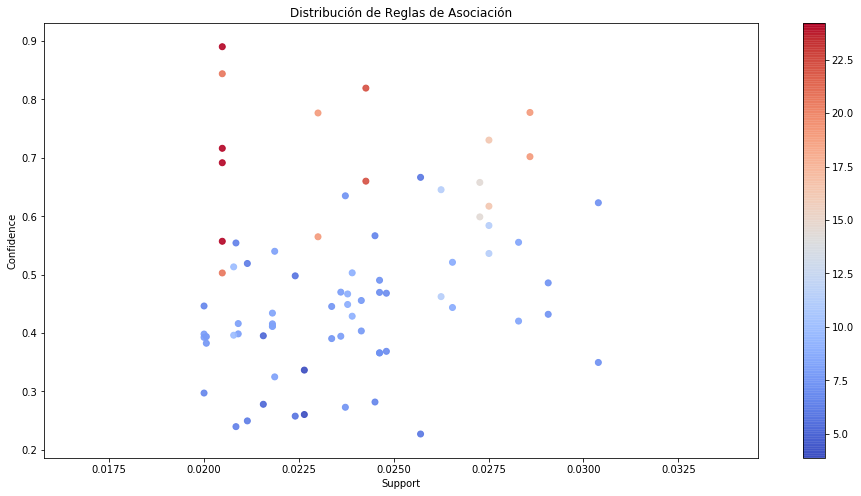

In [97]:
# Visualizando la distribución de las reglas de asociación: 

plt.figure(figsize=(16, 8))
plt.scatter(reglas['support'], reglas['confidence'], c=reglas['lift'], alpha=0.9, cmap='coolwarm');
plt.title('Distribución de Reglas de Asociación');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

### Interpretando el resultado:

* Support - Soporte : Esto indica qué tan popular es un conjunto de elementos, medido por la proporción de transacciones en las que aparece un conjunto de elementos.
* Confidence - Confianza: Esto indica la probabilidad de que se compre el artículo Y cuando se compra el artículo X, expresado como {X -> Y}. Esto se mide por la proporción de transacciones con el artículo X, en el que también aparece el artículo Y.
* Lift: Esto indica la probabilidad de que se compre el artículo Y cuando se compra el artículo X, mientras se controla la popularidad del artículo Y.


Más información del funcionamiento del algoritmo en https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html.